**Customer Segmentation**

We are going to Load a dataset which contains details of details of customers from a mall. So we're dividing the customers into groups that reflect similarity among customers in each group.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Conclusion
1. No null value
2. Gender is of dtype object, which needs to be taken care of.

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Conclusion
1. Avgerage age of customer is 38
2. Customer that visits mall is having the age b/w 18-70
3. Having the avg. annual income as 60k$.

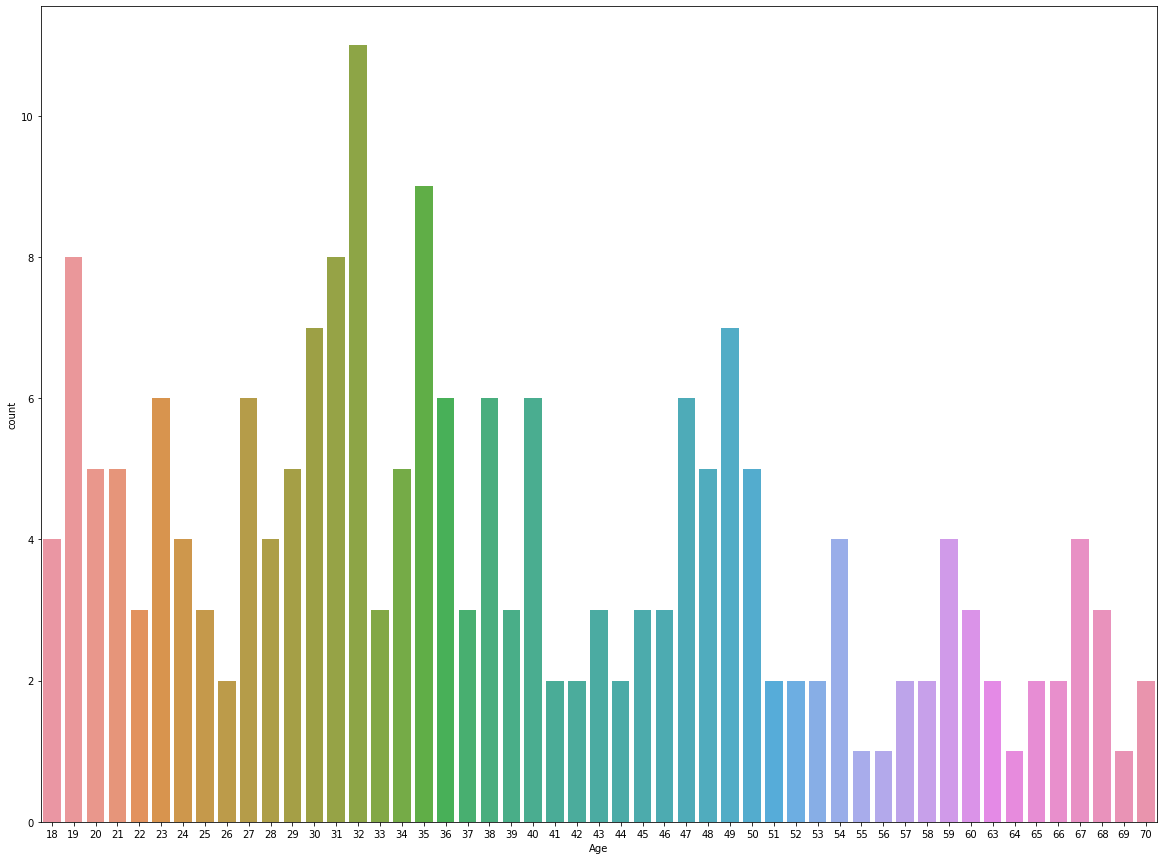

In [8]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age')

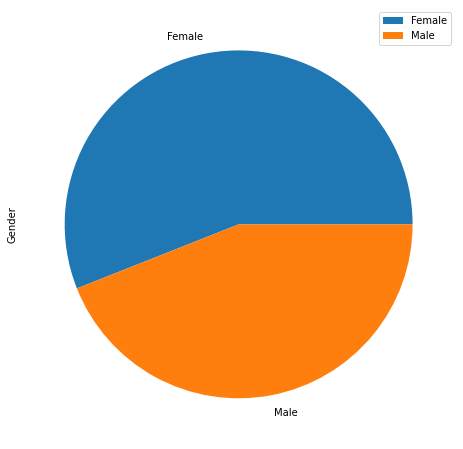

In [9]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind='pie')
plt.legend()

Conclusions
1. No. of females> no. of males
2. People between age  group 30-36 tend to visit mall  more often.

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Distribution of income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of annual income')

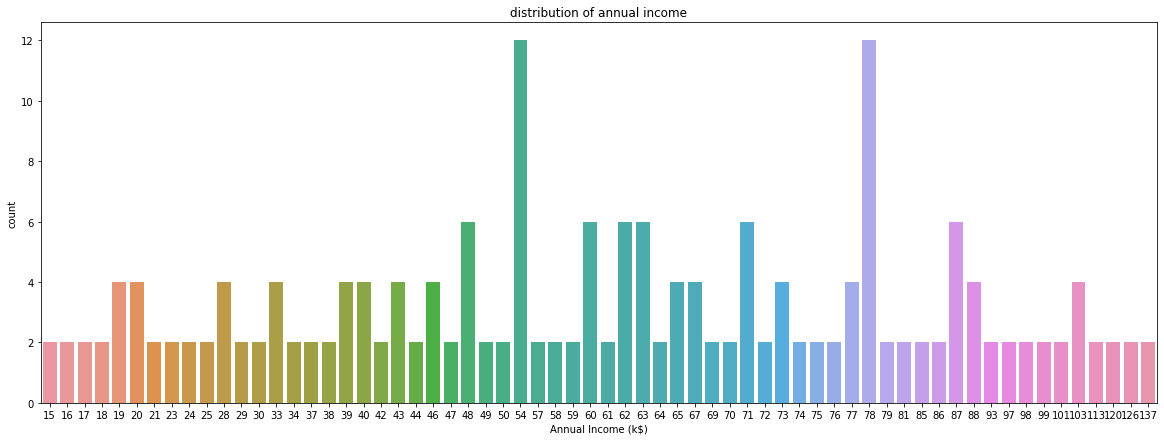

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(df['Annual Income (k$)'],data=df)
plt.title('distribution of annual income')

Conclusion:
The customers that are having the salary of 54k dollars and 78k dollars are visiting mall more number of times.

Show the annual income distribution with respect to the gender

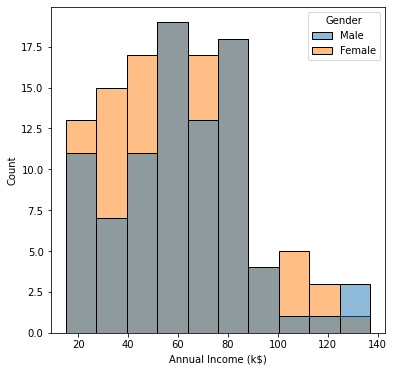

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(df,x='Annual Income (k$)',hue='Gender')

label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enc= LabelEncoder()

In [15]:
df.Gender = enc.fit_transform(df.Gender)

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
df.drop('CustomerID',axis=1,inplace=True)

In [18]:
lst = []
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(df)
    lst.append(kmodel.inertia_)

In [19]:
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51165.18423710792,
 44359.634641148325,
 40674.1545505049,
 37652.38361522199]

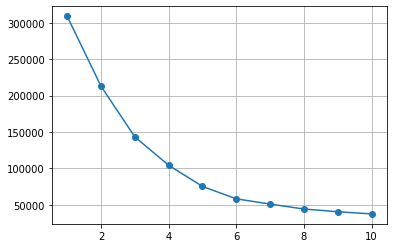

In [20]:
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [21]:
kmodel= KMeans(n_clusters=6)

In [22]:
kmodel.fit(df)

KMeans(n_clusters=6)

In [23]:
prediction=kmodel.predict(df)

In [24]:
kmodel.cluster_centers_

array([[ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [25]:
len(kmodel.cluster_centers_)

6

In [26]:
df['cluster']=prediction

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5


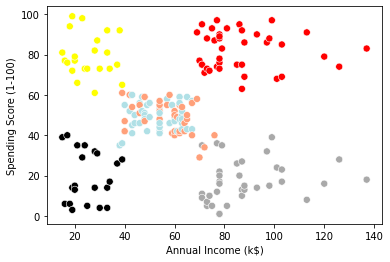

In [28]:
color= np.array(['darkgray','lightsalmon','powderblue','red','yellow','black'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_],s=50)

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [30]:
var = linkage(df,method='ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

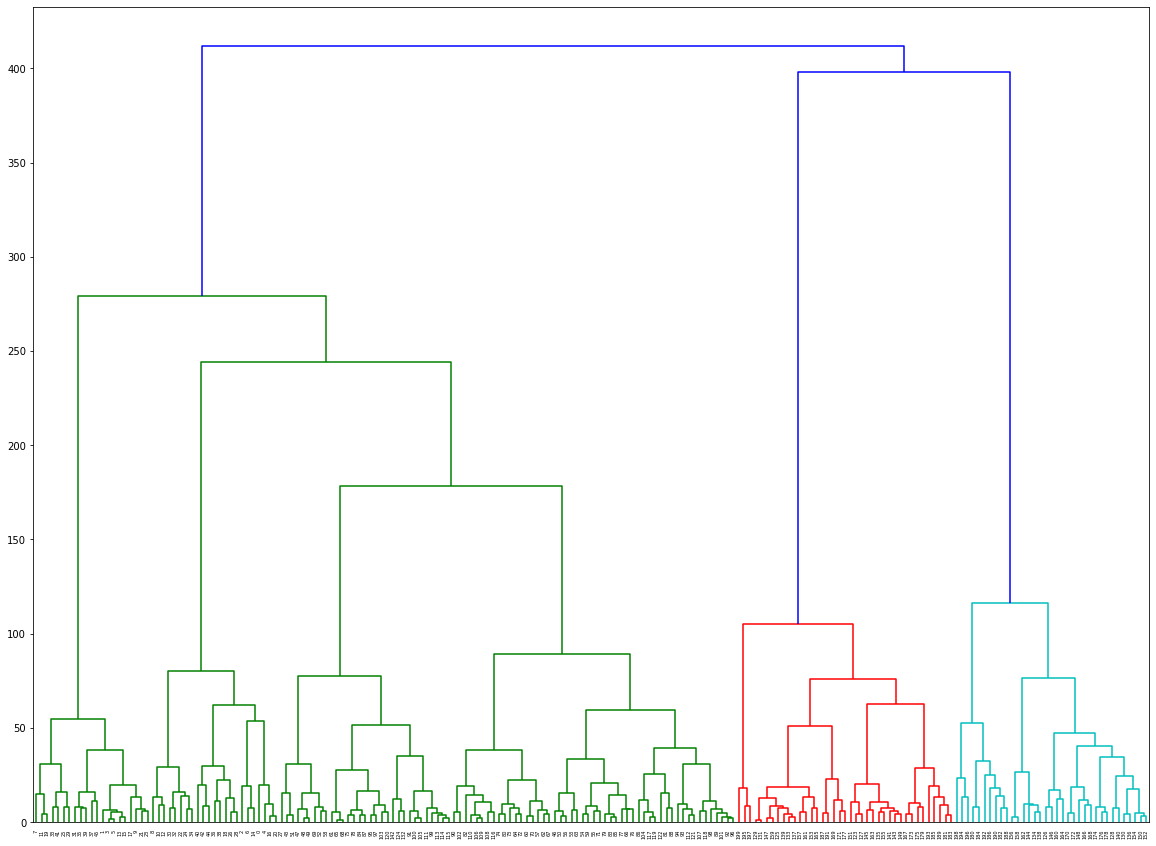

In [31]:
plt.figure(figsize=(20,15))
dendrogram(var)